# Airbnb in San Francisco Data Analysis
Data analysis on San Francisco housing because I'm looking to move to Cali. 
Looking for best time to search for housing + what makes them cheaper

[Link to data source](https://insideairbnb.com/get-the-data/)

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import MaxNLocator

#### Initial data, see data source

In [28]:
listings = pd.read_csv("listings.csv")
calendar = pd.read_csv("calendar.csv")

C:\Users\justin\AppData\Local\Temp\ipykernel_27460\3874267872.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv("calendar.csv")


In [29]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2024-06-04,f,$170.00,NaN,2,1125
1,958,2024-06-05,f,$170.00,NaN,2,1125
2,958,2024-06-06,f,$170.00,NaN,2,1125
3,958,2024-06-07,f,$170.00,NaN,2,1125
4,958,2024-06-08,f,$170.00,NaN,2,1125


In [30]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42737862,https://www.airbnb.com/rooms/42737862,20240604143925,2024-06-04,previous scrape,nice place fill like home,Quiet room in central place in city,NaN,https://a0.muscache.com/pictures/7b86655f-6ead...,28051244,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,9293284,https://www.airbnb.com/rooms/9293284,20240604143925,2024-06-04,previous scrape,Russian Hill 1 Bdrm w/Outdoor Space,This a a high end fully furnished and equipped...,"Walk easily to Washington Square Park, Fisherm...",https://a0.muscache.com/pictures/01cd4971-f39f...,48249770,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,1112315703899234270,https://www.airbnb.com/rooms/1112315703899234270,20240604143925,2024-06-04,previous scrape,Bright 2BR/1BA Noe Valley Home!,Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,567057744,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
3,785706334254160321,https://www.airbnb.com/rooms/785706334254160321,20240604143925,2024-06-04,city scrape,Mint Hill One Bedroom,Located in the center of San Francisco. Close...,Central location near both the Castro and the ...,https://a0.muscache.com/pictures/miso/Hosting-...,1892430,...,5.0,5.0,5.0,NaN,t,17,17,0,0,0.11
4,38675099,https://www.airbnb.com/rooms/38675099,20240604143925,2024-06-04,city scrape,#aD43 Double Sunny Room in near SoMa / Center,This type of room called Double Sunny Room.<br...,Location! It doesn’t get much better than this...,https://a0.muscache.com/pictures/59db0bc1-34aa...,267895362,...,5.0,5.0,4.0,NaN,f,50,1,49,0,0.02


In [31]:
listings['price'] = listings['price'].str.replace('$', '', regex=False)
listings['price'] = listings['price'].str.replace(',', '', regex=False)
listings['price'] = listings['price'].astype(float)
listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42737862,https://www.airbnb.com/rooms/42737862,20240604143925,2024-06-04,previous scrape,nice place fill like home,Quiet room in central place in city,NaN,https://a0.muscache.com/pictures/7b86655f-6ead...,28051244,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,9293284,https://www.airbnb.com/rooms/9293284,20240604143925,2024-06-04,previous scrape,Russian Hill 1 Bdrm w/Outdoor Space,This a a high end fully furnished and equipped...,"Walk easily to Washington Square Park, Fisherm...",https://a0.muscache.com/pictures/01cd4971-f39f...,48249770,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,1112315703899234270,https://www.airbnb.com/rooms/1112315703899234270,20240604143925,2024-06-04,previous scrape,Bright 2BR/1BA Noe Valley Home!,Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,567057744,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
3,785706334254160321,https://www.airbnb.com/rooms/785706334254160321,20240604143925,2024-06-04,city scrape,Mint Hill One Bedroom,Located in the center of San Francisco. Close...,Central location near both the Castro and the ...,https://a0.muscache.com/pictures/miso/Hosting-...,1892430,...,5.00,5.00,5.00,NaN,t,17,17,0,0,0.11
4,38675099,https://www.airbnb.com/rooms/38675099,20240604143925,2024-06-04,city scrape,#aD43 Double Sunny Room in near SoMa / Center,This type of room called Double Sunny Room.<br...,Location! It doesn’t get much better than this...,https://a0.muscache.com/pictures/59db0bc1-34aa...,267895362,...,5.00,5.00,4.00,NaN,f,50,1,49,0,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883,1494503,https://www.airbnb.com/rooms/1494503,20240604143925,2024-06-04,previous scrape,Beautiful Classic Victorian with a Modern Touch,"Modern, spacious, apartment in the heart of S...",Haight Ashbury is a very vibrant neighborhood!...,https://a0.muscache.com/pictures/miso/Hosting-...,7988057,...,5.00,5.00,4.85,City registration pending,f,1,1,0,0,0.10
7884,1487849,https://www.airbnb.com/rooms/1487849,20240604143925,2024-06-04,previous scrape,Holladay Home (w/ parking),Holladay Home is a cozy delux studio in Bernal...,The best part about this neighborhood is the w...,https://a0.muscache.com/pictures/2f36d14f-2f8b...,1590094,...,4.81,4.58,4.51,STR-0004116,f,1,1,0,0,3.11
7885,2636716,https://www.airbnb.com/rooms/2636716,20240604143925,2024-06-04,previous scrape,Studio Apt- Close to Everything,Studio in a central location with easy transpo...,NaN,https://a0.muscache.com/pictures/7489a372-e7bd...,4437415,...,4.35,4.50,4.00,NaN,f,1,1,0,0,0.20
7886,2702606,https://www.airbnb.com/rooms/2702606,20240604143925,2024-06-04,previous scrape,Murphy bed in startup office,"We have an office that is occupied by day, but...",NaN,https://a0.muscache.com/pictures/35301276/bb2e...,13830783,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


### Too many null values in the columns. Dropping them so I can plot

In [32]:
listings = listings.dropna(subset=['price'])
non_nan_rows = listings[listings['price'].notna()]['price']
non_nan_rows

3       113.0
4        60.0
5       143.0
6        60.0
7        50.0
        ...  
7815     89.0
7816    166.0
7817    166.0
7818    273.0
7819    202.0
Name: price, Length: 6190, dtype: float64

In [33]:
price = non_nan_rows.value_counts().sort_index()
price

price
25.0       1
33.0       1
34.0       2
35.0       5
37.0       1
          ..
4950.0     1
5555.0     2
6000.0     1
10000.0    2
25000.0    1
Name: count, Length: 646, dtype: int64

#### Price distribution

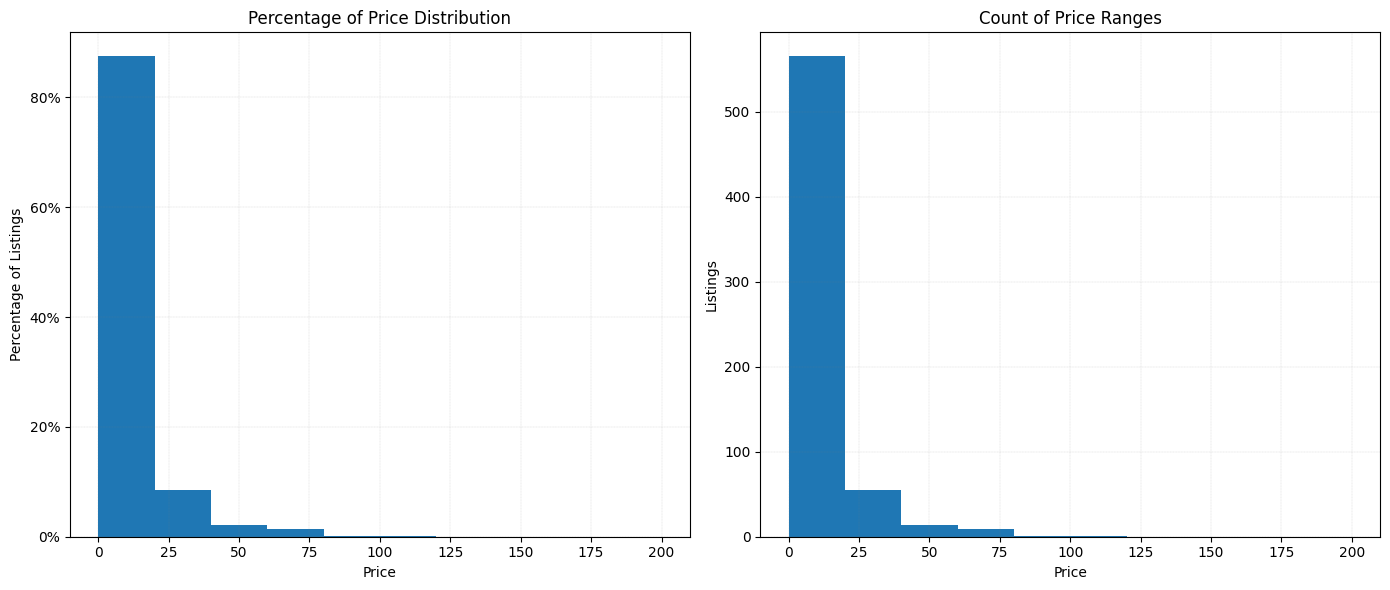

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Price distribution
axs[0].hist(price, weights=np.ones(len(price)) / len(price), range=[0, 200])
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Percentage of Price Distribution')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Percentage of Listings')
axs[0].grid(color='grey', linestyle=':', linewidth=0.2)


# Price count
axs[1].hist(price, range=[0, 200])
axs[1].set_title('Count of Price Ranges')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Listings')
axs[1].grid(color='grey', linestyle=':', linewidth=0.2)

plt.tight_layout()
plt.show()

### Observation: Majority of listings are priced under $75/day.
#### Types of properties, only considering popular property types

Text(0, 0.5, 'Property Type')

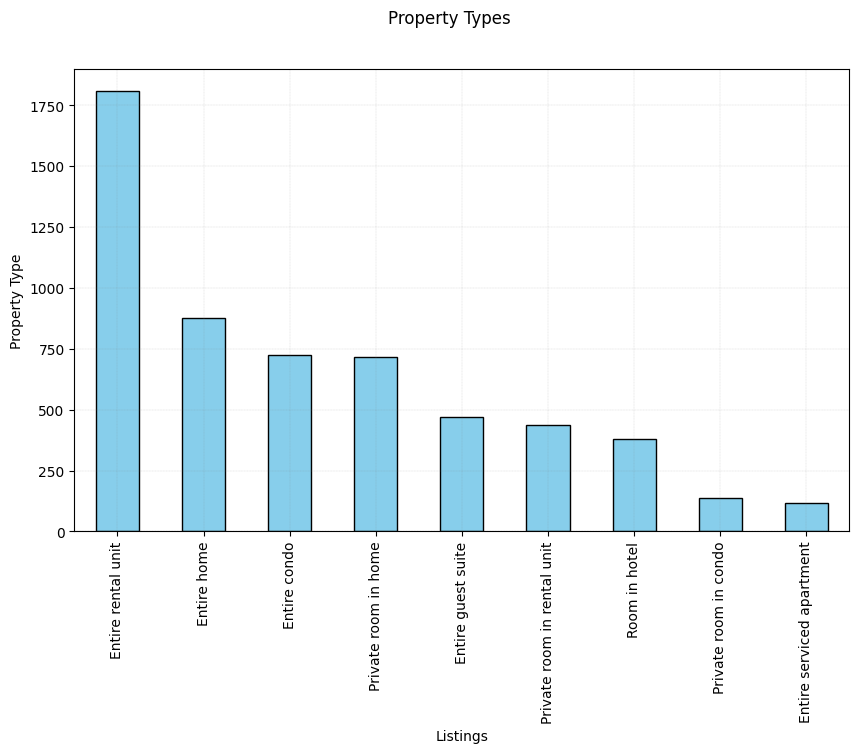

In [35]:
property_counts = listings.property_type.value_counts()
filtered_property_counts = property_counts[property_counts > 100]
fig, axs = plt.subplots(figsize=(10, 6))
filtered_property_counts.plot.bar(ax=axs, color='skyblue', edgecolor='black')
axs.grid(color='grey', linestyle=':', linewidth=0.2)
fig.suptitle('Property Types')
plt.xlabel('Listings')
plt.ylabel('Property Type')

## Best time to look for houses

In [36]:
ava_count = calendar.groupby('date')['available'].apply(lambda x: (x == 't').sum())

ava_count = ava_count.reset_index()
ava_count = ava_count.rename(columns={'available': 'total_availability'})
ava_count.head()

,date,total_availability
0,2024-06-04,1529
1,2024-06-05,2151
2,2024-06-06,2391
3,2024-06-07,2368
4,2024-06-08,2280


#### House availability visualization

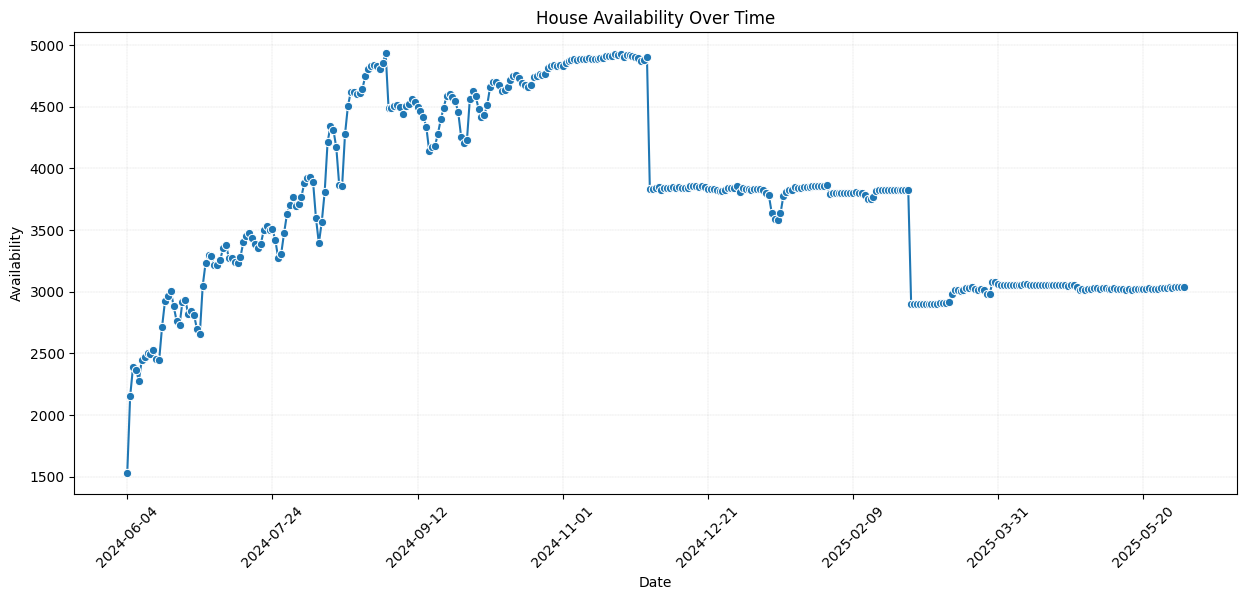

In [37]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=ava_count, x='date', y='total_availability', marker='o')

plt.grid(color='grey', linestyle=':', linewidth=0.2)
plt.title('House Availability Over Time')
plt.xlabel('Date')
plt.ylabel('Availability')
plt.xticks(rotation=45) 

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))
plt.xticks(rotation=45) 

plt.show()


### Observation: Data anomalies when airbnb listings are too far out. Look for places towards the Fall.

## Looking at San Francisco neighborhoods and which ones are cheaper

In [38]:
# Average prices for a house in a neighborhood
cleaned_listings = listings[listings['price'].notna() & listings['neighbourhood_cleansed'].notna()]

cleaned_listings = cleaned_listings[['price', 'neighbourhood_cleansed']]
ave_neighborhood_price = cleaned_listings.groupby('neighbourhood_cleansed').mean()[['price']]
ave_neighborhood_price

,price
neighbourhood_cleansed,
Bayview,129.674603
Bernal Heights,228.557252
Castro/Upper Market,308.704453
Chinatown,216.173913
Crocker Amazon,113.617647
Diamond Heights,342.384615
Downtown/Civic Center,231.361675
Excelsior,127.823129
Financial District,387.122093


## Maybe certain neighborhoods are expensive?

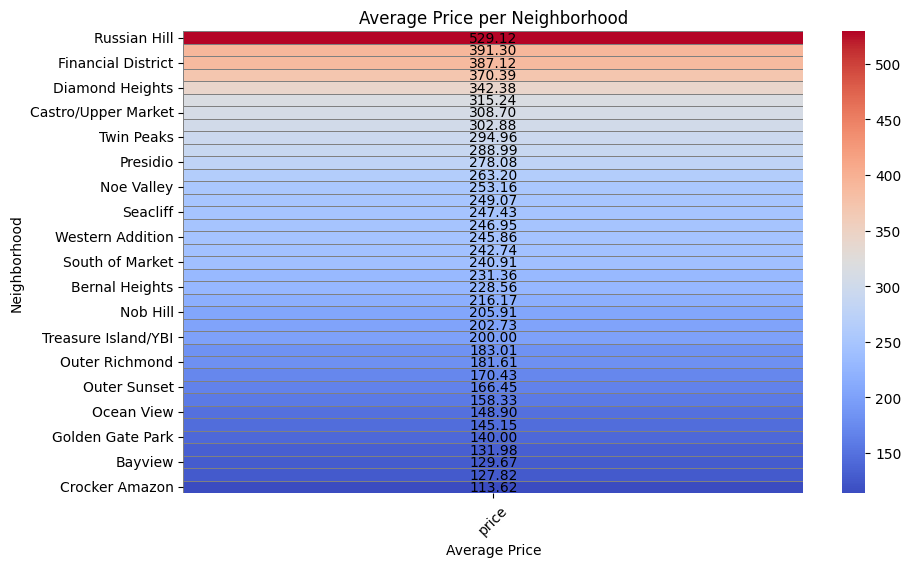

In [39]:
pivot_table = ave_neighborhood_price.pivot_table(index='neighbourhood_cleansed', values='price')

pivot_table_sorted = pivot_table.sort_values(by='price', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(pivot_table_sorted, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray', annot_kws={'size': 10, 'color': 'black'})

plt.title('Average Price per Neighborhood')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

## Cheapest neighborhoods

In [40]:
ave_neighborhood_price.sort_values(by=['price']).head()

,price
neighbourhood_cleansed,
Crocker Amazon,113.617647
Excelsior,127.823129
Bayview,129.674603
Lakeshore,131.981481
Golden Gate Park,140.000000


#### Most popular neighborhoods

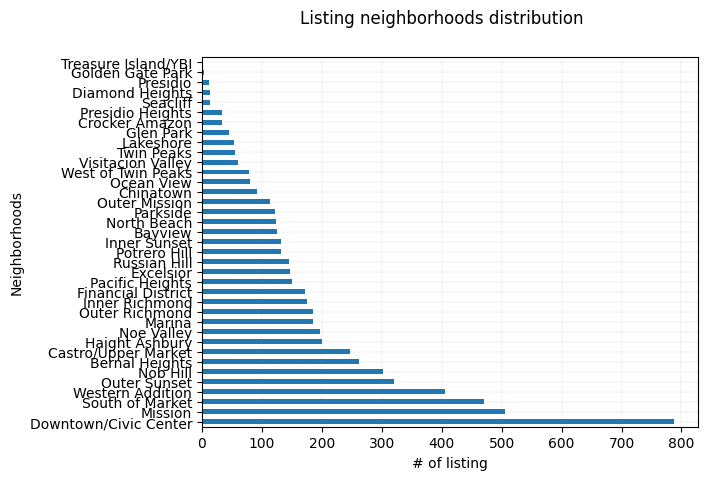

In [41]:
fig, axs = plt.subplots()
listings.neighbourhood_cleansed.value_counts().plot.barh()
plt.grid(color='grey', linestyle=':', linewidth=0.2)
fig.suptitle('Listing neighborhoods distribution')
plt.xlabel('# of listing')
plt.ylabel('Neighborhoods')
plt.show()

## Random forest model -> why some houses are more expensive

In [42]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

#### Data Preparation

In [43]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [44]:
listings_rf=listings

#### Removing useless columns; data cleaning

In [45]:
listings_rf = listings_rf.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood','host_listings_count','host_total_listings_count',
       'host_verifications','calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',], axis=1)

In [46]:
listings_rf.describe()

,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,0.0,6190.000000,6190.000000,6190.000000,6185.000000,6182.000000,6127.000000,6190.000000,6190.000000,6190.000000,...,4893.000000,4892.000000,4893.000000,4892.000000,4892.000000,6190.000000,6190.000000,6190.000000,6190.000000,4896.000000
mean,NaN,37.768694,-122.431243,3.270921,1.327162,1.431899,1.646809,241.385460,19.560420,719.702100,...,4.791343,4.895219,4.881026,4.784908,4.693782,22.971405,11.653150,11.185137,0.080614,1.439592
std,NaN,0.022969,0.027945,2.031449,0.718702,1.035280,1.303433,470.187742,42.057207,17971.975144,...,0.350479,0.253594,0.287839,0.370652,0.356953,57.029418,35.013845,47.337991,0.431206,1.967015
min,NaN,37.708540,-122.512110,1.000000,0.000000,0.000000,0.000000,25.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,NaN,37.753570,-122.443757,2.000000,1.000000,1.000000,1.000000,105.000000,2.000000,30.000000,...,4.750000,4.890000,4.880000,4.750000,4.620000,1.000000,1.000000,0.000000,0.000000,0.210000
50%,NaN,37.773680,-122.422985,2.000000,1.000000,1.000000,1.000000,166.000000,4.000000,360.000000,...,4.910000,4.970000,4.970000,4.890000,4.780000,2.000000,1.000000,0.000000,0.000000,0.680000
75%,NaN,37.787978,-122.411720,4.000000,1.500000,2.000000,2.000000,261.000000,30.000000,365.000000,...,5.000000,5.000000,5.000000,5.000000,4.900000,10.000000,3.000000,2.000000,0.000000,2.070000
max,NaN,37.810943,-122.366043,16.000000,10.000000,11.000000,13.000000,25000.000000,365.000000,999999.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,270.000000,177.000000,268.000000,6.000000,33.810000


In [47]:
data = pd.get_dummies(listings_rf)
data = data.fillna(value=0)

In [48]:
# Extract features and labels
Y = data['price']
X = data.drop('price', axis = 1)

In [49]:
# Train
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state = 8)

#### Data modeling

In [50]:
# Model
rf = RandomForestClassifier() 
rf.fit(train_X, train_Y)
rf.score(test_X, test_Y)

0.12596899224806202

### Somewhat useless

#### Results

In [51]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X.columns,
                                columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
latitude,0.025981
longitude,0.025675
calculated_host_listings_count,0.018655
minimum_nights_avg_ntm,0.016337
reviews_per_month,0.015667
...,...
"amenities_[""Smoke alarm"", ""Carbon monoxide alarm"", ""Smart lock"", ""Wifi"", ""Self check-in"", ""Beach access \u2013 Beachfront"", ""Lock on bedroom door"", ""First aid kit"", ""Fire extinguisher"", ""Washer""]",0.000000
"amenities_[""Smoke alarm"", ""Carbon monoxide alarm"", ""Smart lock"", ""Wifi"", ""TV"", ""Self check-in"", ""Cooking basics"", ""Iron"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Kitchen"", ""Hair dryer""]",0.000000
"amenities_[""Smoke alarm"", ""Carbon monoxide alarm"", ""Wifi"", ""Dedicated workspace"", ""Refrigerator"", ""Dryer"", ""Oven"", ""Stove"", ""Bed linens"", ""Heating"", ""Fire extinguisher"", ""Kitchen"", ""Washer"", ""Clothing storage"", ""Hot water""]",0.000000
"amenities_[""Smoke alarm"", ""Carbon monoxide alarm"", ""Wifi"", ""Dedicated workspace"", ""TV with standard cable"", ""Shampoo"", ""Iron"", ""Heating"", ""Fire extinguisher"", ""Kitchen"", ""Hair dryer"", ""Hangers""]",0.000000


In [52]:
feature_importances.head(10)

,importance
latitude,0.025981
longitude,0.025675
calculated_host_listings_count,0.018655
minimum_nights_avg_ntm,0.016337
reviews_per_month,0.015667
maximum_nights,0.015258
number_of_reviews,0.015105
accommodates,0.014426
maximum_nights_avg_ntm,0.014227
review_scores_value,0.014011
